In [351]:
# IMPORT GEODATA

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
from matplotlib import cm
import mapclassify as mc
    


shapefile = 'ne_110m_admin_0_countries.shp'

gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()


,country,country_code,geometry
0,Fiji,FJI,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,United Republic of Tanzania,TZA,POLYGON ((33.90371119710453 -0.950000000000000...
2,Western Sahara,SAH,POLYGON ((-8.665589565454809 27.65642588959236...
3,Canada,CAN,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,United States of America,USA,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


        country country_code  \
159  Antarctica          ATA   

                                              geometry  
159  (POLYGON ((-48.66061601418252 -78.047018731598...  


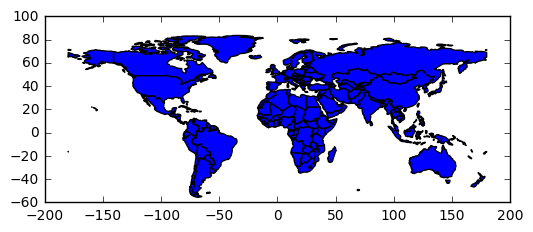

In [352]:
# drop antartica, uneccessary

print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
gdf2 = gdf.drop(gdf.index[159])

gdf2.plot()

gdf2.to_csv("georeference.csv", index=False, encoding='utf8')

In [353]:
#IMPORT DATA 

import pandas as pd

#datafile = '1980+2013.csv'
df1 = pd.read_csv('1980+2013.csv') 

# column Neu2013 is an object not a float
df1['Neu2013'] = pd.to_numeric(df1['Neu2013'], errors='coerce')
df1.loc[36]
df1.shape

(183, 4)

In [354]:
df2=pd.read_csv('2013-1980.csv')
df2.head()
df2.shape

(183, 2)

In [355]:
df = pd.merge(df1, df2, how='inner', on=['Country', 'Country'])
df = df[['Country','Neu1980','Neu2013','difference', 'CODE']]

df.to_csv("2013_1980_difference.csv", index=False, encoding='utf8')
df.loc[0:40]
df.shape

(183, 5)

In [369]:
# join the geodataframe with the csv dataframe
merged = gdf2.set_index('country_code').join(df.set_index('CODE'))

# fatto per controllare valori tra tabelle ---- IGNORARE PER CHOROLPLETHMAP
merged2 = merged.drop(['geometry'], axis=1)
merged2.to_csv("merged.csv", index=False, encoding='utf8')
merged2.head()
merged2.loc['CHE']

country       Switzerland
Country       Switzerland
Neu1980           44708.5
Neu2013           37891.3
difference       -6817.22
Name: CHE, dtype: object

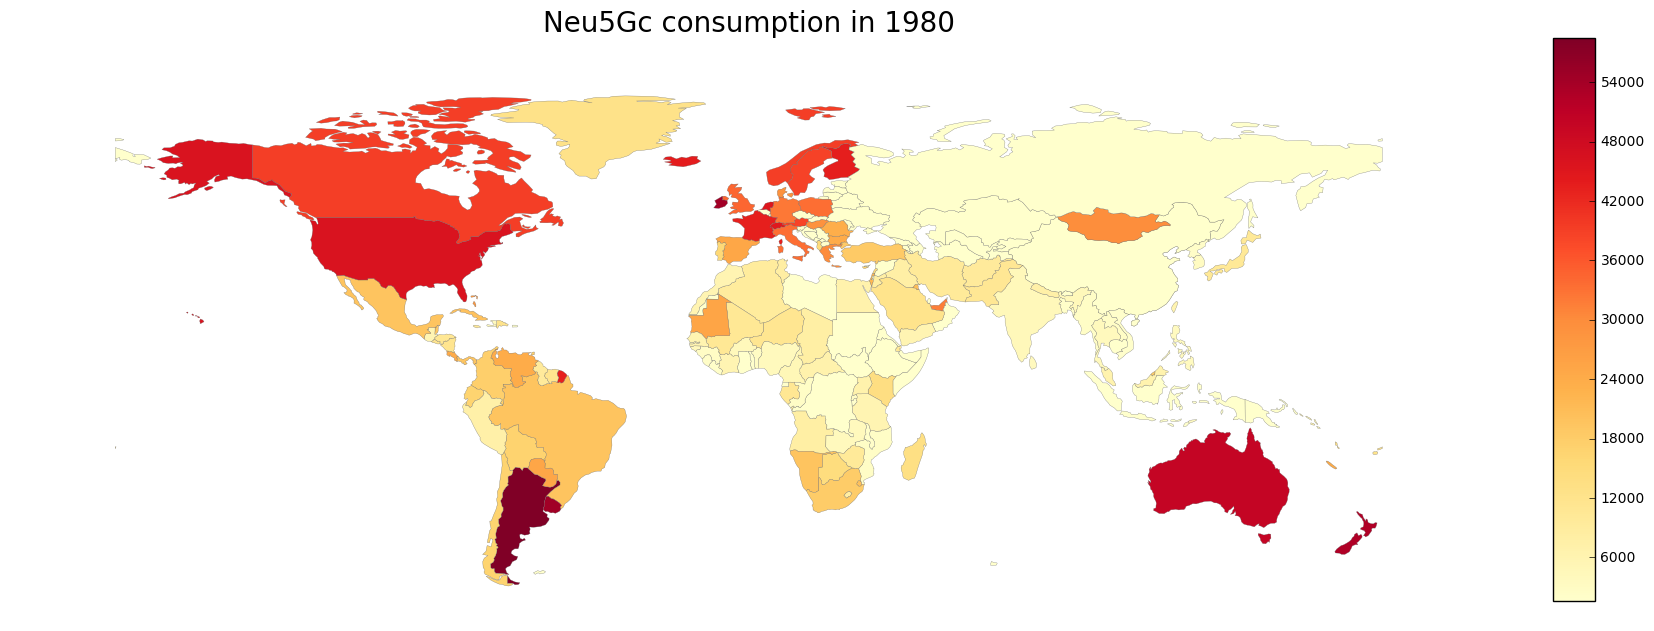

In [372]:
# CHOROLPLETHMAP 1980 and 2013



# !!!!! NB !!!!!! -----   CHANGE VARIABLE, TITLE AND SAVED FILE NAME



# set a variable that will call whatever column we want to visualise on the map
variable = 'Neu1980'


# set the range for the choropleth ---- vmax/vmin = Minimum value to be shown on the map. 
# If vmin is larger than the actual minimum value in the data, some of the data values will be “clipped”. 
# This is useful if there are extreme values in the data and you do not want those values to complete skew 
# the color distribution.
# !!!! NB !!!!!! questo passaggio non e necessatio per questa versione di jupyter, perche e gia integrato,
# per versione nuova vedi documentazione >>> https://github.com/ResidentMario/geoplot/issues/163
 
#vmin, vmax = 0, 500000


# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 12))

# add a title
title='Neu5Gc consumption in 1980'
ax.set_title(title, fontdict= 
            {'fontsize':20, 'fontweight':'3'})

# remove the axis
ax.axis('off')

# Create colorbar as a legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=1) #size=larghezza legend; pad= anchor 

merged.plot (column=variable, 
             #scheme='equal_interval', k=20, ----- NB if scheme >>> #create color bar legend non deve essere presente
             cmap = 'YlOrRd', linewidth=0.2, ax=ax, edgecolor='0.4', 
             legend=True, cax=cax)


fig.savefig('map_1980.eps')   




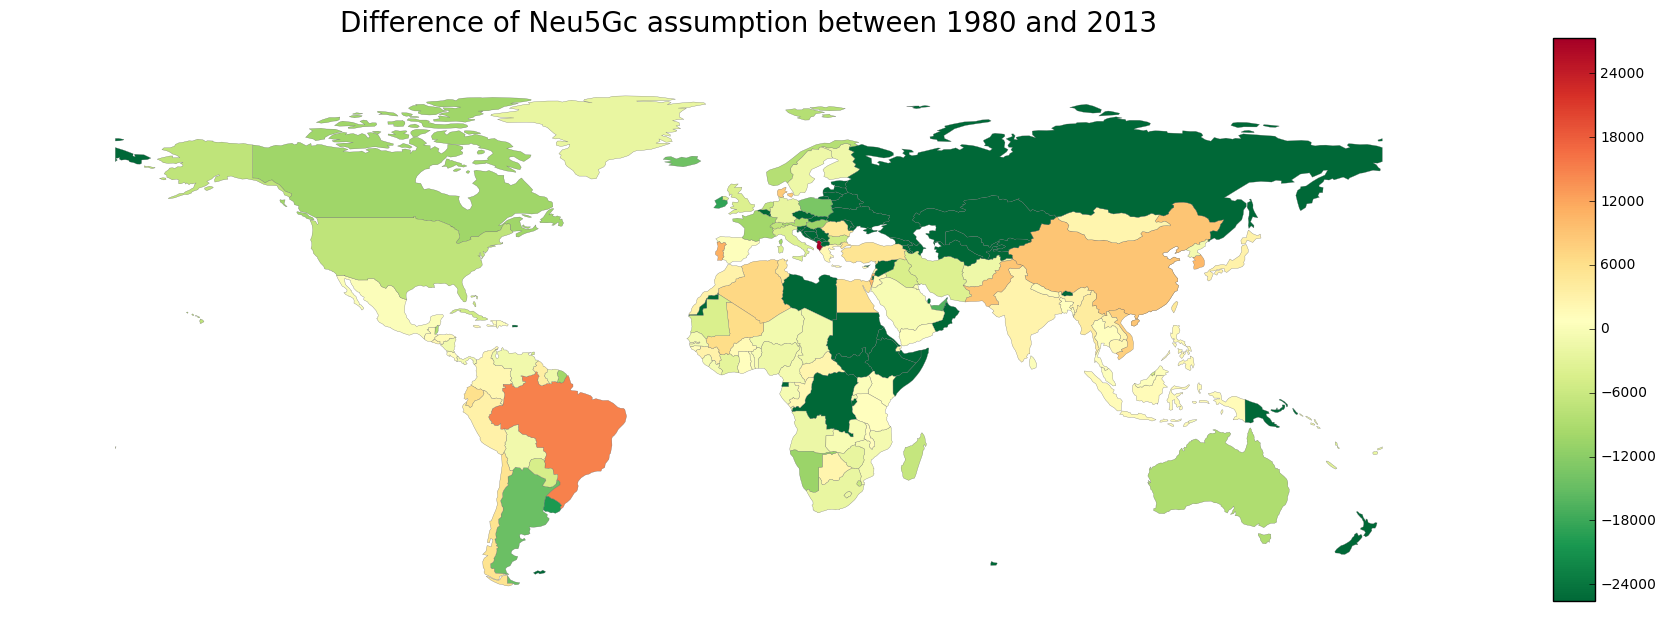

In [373]:
# CHOROLPLETHMAP 1980/2013/difference


# set a variable that will call whatever column we want to visualise on the map
variable = 'difference'



# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 12))

# add a title
ax.set_title('Difference of Neu5Gc assumption between 1980 and 2013', fontdict= 
            {'fontsize':20, 'fontweight':'3'})

# remove the axis
ax.axis('off')

# Create colorbar as a legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=1) #size=larghezza legend; pad= anchor 
#sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax)) ---- se si usa vmax/vmin


merged.plot (column=variable, cmap = 'RdYlGn_r', linewidth=0.2, ax=ax, edgecolor='0.4',  legend=True, cax=cax)

fig.savefig('map_difference.eps')   

#scheme='QUANTILES', k=3,
#legend_kwds={'label': "Neu5Gc mg capita/day", 'orientation': "vertical"},
